In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
# load the dataset
df = pd.read_csv('/content/waterprediction.csv', sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [6]:
# Check null values
print(df.isnull().sum())

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64


In [7]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [18]:
print(df.isnull().sum())


id           0
date         0
NH4          0
BSK5         0
Suspended    0
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
dtype: int64


In [19]:
df.info() # dataset info

<class 'pandas.core.frame.DataFrame'>
Index: 2861 entries, 43 to 2818
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2861 non-null   float64
 3   BSK5       2861 non-null   float64
 4   Suspended  2861 non-null   float64
 5   O2         2861 non-null   float64
 6   NO3        2861 non-null   float64
 7   NO2        2861 non-null   float64
 8   SO4        2861 non-null   float64
 9   PO4        2861 non-null   float64
 10  CL         2861 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 268.2+ KB


In [20]:
df = df.sort_values(by=['id', 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
43,1,01.12.2010,0.291,3.27,16.7,12.30,59.20,0.090,278.4,0.370,1375.46
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.00
41,1,02.06.2010,0.290,3.52,37.2,7.16,57.87,0.210,268.8,0.240,1120.20
22,1,02.09.2005,0.000,3.68,28.5,14.20,15.51,0.033,422.4,0.900,2063.80
62,1,02.09.2015,0.035,6.28,104.8,7.80,4.68,0.076,694.4,0.530,5615.28


In [22]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [23]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
43,1,2010-12-01,0.291,3.27,16.7,12.30,59.20,0.090,278.4,0.370,1375.46,2010,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.00,2001,3
41,1,2010-06-02,0.290,3.52,37.2,7.16,57.87,0.210,268.8,0.240,1120.20,2010,6
22,1,2005-09-02,0.000,3.68,28.5,14.20,15.51,0.033,422.4,0.900,2063.80,2005,9
62,1,2015-09-02,0.035,6.28,104.8,7.80,4.68,0.076,694.4,0.530,5615.28,2015,9


In [24]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [25]:
pollutants = ['O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']

In [26]:
# Feature and target selection - Feature - independent variable and Target dependent variable
X = df[['id', 'year']]
y = df[pollutants]

In [27]:
# Encoding - onehotencoder - 22 stations - 1 - 1
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [28]:
# Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [29]:
# Train the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [30]:
# Evaluate model
y_pred = model.predict(X_test)

In [31]:
print("Model Performance on the Test Data:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

Model Performance on the Test Data:
O2:
   MSE: 16.214325734462975
   R2: 0.20655242780395378

NO3:
   MSE: 22.918853285710963
   R2: 0.13768757242002794

NO2:
   MSE: 1.9284906019044665
   R2: -0.5492689686404966

SO4:
   MSE: 891.6537667209057
   R2: 0.7379601775145798

PO4:
   MSE: 0.43629893628082766
   R2: 0.3922645798773762

CL:
   MSE: 32072.143998934986
   R2: 0.6105588911673302



In [36]:
def predict_water_quality(nh4, bsk5, suspended):
    input_df = pd.DataFrame([[nh4, bsk5, suspended]], columns=['NH4', 'BSK5', 'Suspended'])
    prediction = model.predict(input_df)[0]
    print("\n🔮 Predicted Pollutant Levels:")
    for name, val in zip(y.columns, prediction):
        print(f"{name}: {val:.2f}")


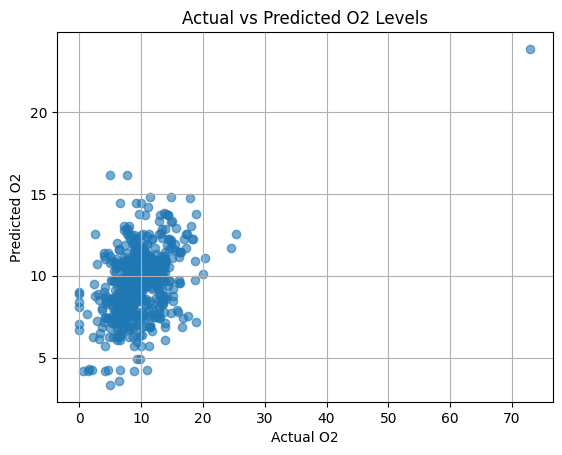

In [37]:
import matplotlib.pyplot as plt

plt.scatter(y_test['O2'], [pred[0] for pred in y_pred], alpha=0.6)
plt.xlabel("Actual O2")
plt.ylabel("Predicted O2")
plt.title("Actual vs Predicted O2 Levels")
plt.grid(True)
plt.show()
